In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
from datasets.Dataset import get_mnist
from models.Feedforward_Model import FNN
import os

In [10]:
# Experiment parameters
EXPERIMENT_NAME="FNN_MNIST_300"
N_LAYERS=300
LBE_BETA=0.2
N_EPOCHS=100
BATCH_SIZE=512
LEARNING_RATE=1e-4

# load data
train_ds, val_ds = get_mnist(batch_size=BATCH_SIZE)

# Train a 400 layer feedforward neural network without any skip connections 
# without Layer Batch Entropy regularization
print("Without Layer Batch Entropy Regularization:\n\n")
fnn = FNN(n_layers=N_LAYERS, use_LBE=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

fnn.compile(optimizer=optimizer)
without_lbe_history = fnn.fit(train_ds, validation_data=val_ds, batch_size=BATCH_SIZE, epochs=N_EPOCHS)

# Train the same network with LBE regularization
print("\nWith Layer Batch Entropy Regularization:\n\n")
fnn = FNN(n_layers=N_LAYERS, use_LBE=True, LBE_strength=LBE_BETA)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

fnn.compile(optimizer=optimizer)
with_lbe_history = fnn.fit(train_ds, validation_data=val_ds, batch_size=BATCH_SIZE, epochs=N_EPOCHS)

Without Layer Batch Entropy Regularization:


Epoch 1/100
118/118 [==============================] - 19s 65ms/step - loss: 2.3025 - accuracy: 0.1122 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 2/100
118/118 [==============================] - 5s 45ms/step - loss: 2.3023 - accuracy: 0.1124 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 3/100
118/118 [==============================] - 5s 43ms/step - loss: 2.3021 - accuracy: 0.1124 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 4/100
118/118 [==============================] - 5s 43ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 5/100
118/118 [==============================] - 5s 42ms/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 6/100
118/118 [==============================] - 5s 42ms/step - loss: 2.3018 - accuracy: 0.1124 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 7/100
118/118 [==============================] - 5s 42ms/step - loss: 2.3017 - accu

KeyboardInterrupt: 

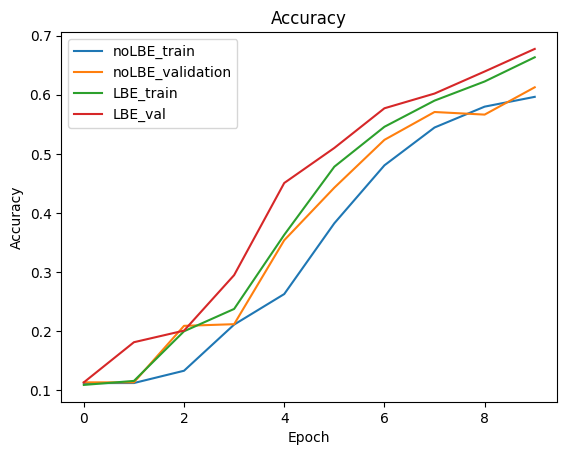

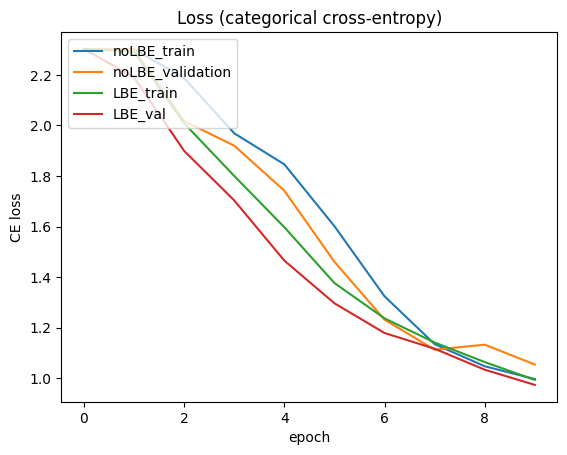

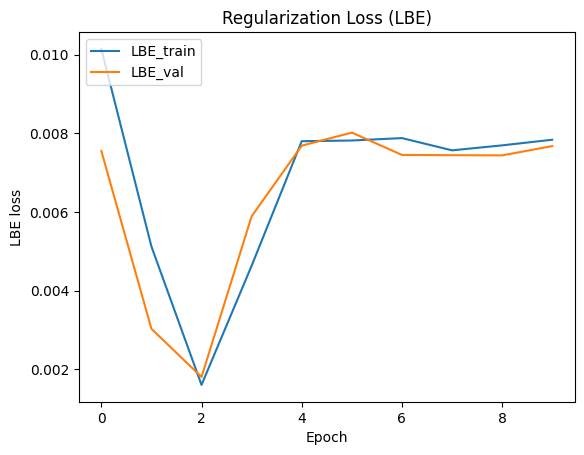

In [7]:
os.makedirs(f"experiments/results/{EXPERIMENT_NAME}/", exist_ok=True)

plt.rcParams['savefig.facecolor']='white'
# plot accuracies
plt.plot(without_lbe_history.history['accuracy'])
plt.plot(without_lbe_history.history['val_accuracy'])
plt.plot(with_lbe_history.history['accuracy'])
plt.plot(with_lbe_history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['noLBE_train', 'noLBE_validation',"LBE_train","LBE_val"], loc='upper left')
plt.savefig(f"experiments/results/{EXPERIMENT_NAME}/accuracies.svg")
plt.show()


# plot categorical crossentropy loss
plt.plot(without_lbe_history.history['loss'])
plt.plot(without_lbe_history.history['val_loss'])
plt.plot(with_lbe_history.history['ce'])
plt.plot(with_lbe_history.history['val_ce'])
plt.title('Loss (categorical cross-entropy)')
plt.ylabel('CE loss')
plt.xlabel('epoch')
plt.legend(['noLBE_train', 'noLBE_validation',"LBE_train","LBE_val"], loc='upper left')
plt.savefig(f"experiments/results/{EXPERIMENT_NAME}/crossentropy.svg")
plt.show()

# plot average layer batch entropy error for each epoch
plt.plot(with_lbe_history.history['lbe'])
plt.plot(with_lbe_history.history['val_lbe'])
plt.title('Regularization Loss (LBE)')
plt.ylabel('LBE loss')
plt.xlabel('Epoch')
plt.legend(["LBE_train","LBE_val"], loc='upper left')
plt.savefig(f"experiments/results/{EXPERIMENT_NAME}/LBE_loss.svg")
plt.show()